# Counterfeit Medicine Sales Prediction

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

| Variable                   |        Values                                                              |
|----------------------------|----------------------------------------------------------------------------|
|Medicine_ID                 |Alphanumeric identification number;Norminal Integer                         |
|Counterfeit_weight          |weighted percentage attached to each medicine;continuous                    |
|District_ID                 |District identification number; alphanumeric                                |
|Active since                |year monitoring started;Integer                                             |
|Medicine MRP                |Medicine price list;continuous                                              |  
|Medicine type               |the form of the medicine;categorical                                        |
|Side effect level           |the severity of the side effect associated with the medicine,categorical    |
|Availability rating         |the rate at which the medicine is available,continuous                      |
|Area type                   |the level of development of an area,                                        |
|Area city type              |the rating of the city;categorical                                          |
|Area district level         |the level of the area district;categorical                                  |
|Counterfeit sales           |value of sales,continuous                                                   |
                           
                           





## Load Library, Packages, Modules

In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor 



## Load Data

In [69]:
# change directory
# point to the directory that house the data
os.chdir('../data')

In [70]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [71]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [72]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [73]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [74]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [75]:
#check the dimension
all_data.shape

(8523, 13)

In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [77]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [59]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [81]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing value after treatment 0


In [85]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [92]:
# columns with float type
all_data.select_dtypes(include=['float64']).columns

Index(['counterfeit_weight', 'medicine_mrp', 'availability_rating',
       'counterfeit_sales'],
      dtype='object')

In [95]:
#column with integer data type
all_data.select_dtypes(include=['int64']).columns

Index(['active_since'], dtype='object')

In [98]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [11]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?


In [104]:
#which area type has the highest counterfeit drug
train_data['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [15]:
#which medicine type has the lowest count
train_data['Medicine_Type'].value_counts(ascending=True)

Antiviral              49
Stimulants             95
Antifungal            111
MuscleRelaxants       139
Statins               167
Antacids              206
Antimalarial          339
Analgesics            356
Tranquilizers         420
Mstablizers           514
Cardiac               522
Antipyretics          536
OralContraceptives    694
Antiseptics           724
Antibiotics           970
Hreplacements         976
Name: Medicine_Type, dtype: int64

In [16]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [17]:
#what is the lowets value of counterfeit sales
train_data['Counterfeit_Sales'].min()

146.28999999999999

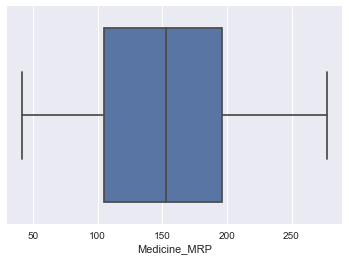

In [22]:
#any outlier in the Medicine MRP columns
sns.boxplot(train_data['Medicine_MRP'])